In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.format_csv import csv_format
import seaborn as sns
from matplotlib import rcParams

# will not work until you pip3 install import-ipynb and pip3 install nbformat\n",
import import_ipynb
from format_csv import csv_format

# Set up plot specifications
sns.set(style='ticks')
sns.axes_style('white')
sns.set_context('paper')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'Avenir'


<ipython-input-78-fb380e5b1321>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, LineWidth=1, label="scope_0 raw", color = '#3C71FF')


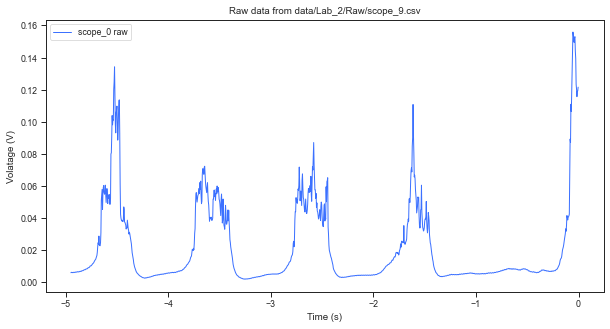

In [78]:
# Choose File to be plotted
scope_num = 9
lab_num = 2
data = f'data/Lab_{lab_num}/Raw/scope_{scope_num}.csv'
csv_format(data)
df = pd.read_csv(data, delimiter=',', skiprows=0)

# initialise data for anaysis
dt = 1
t = df['Time']
f = df['Sensor']  

# Plot Raw data from CSV
plt.plot(t, f, LineWidth=1, label="scope_0 raw", color = '#3C71FF')
plt.xlabel('Time (s)')
plt.ylabel('Volatage (V)')
plt.title(f'Raw data from {data}')
plt.legend()

# save raw scope as png in data/plots
image_path = f'data/Plots/Lab_{lab_num}/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

<ipython-input-79-b4b2a6ba7d9c>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color = '#3C71FF', LineWidth=2, label="Clean")
<ipython-input-79-b4b2a6ba7d9c>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='#07DCCB', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


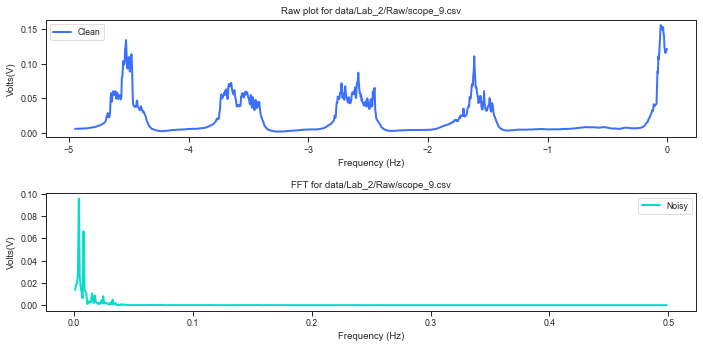

In [79]:
## Compute the Fast Fourier Transform (FFT)
n = len(t)                     
fhat = np.fft.fft(f,n)       
PSD = fhat * np.conj(fhat)/n 
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = [10, 15]

# Raw Plot
plt.sca(axs[0])
plt.plot(t, f, color = '#3C71FF', LineWidth=2, label="Clean")
plt.title(f'Raw plot for {data}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

# FFT of Raw Data
plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='#07DCCB', LineWidth=2, label="Noisy")
plt.title(f'FFT for {data}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()
plt.tight_layout()

plt.show()

<ipython-input-80-f606a28bf2b9>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, f, color='#07DCCB', LineWidth=1.5, label="Noisy")
<ipython-input-80-f606a28bf2b9>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-80-f606a28bf2b9>:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L], PSD[L], color='#07DCCB', LineWidth=2, label="Noisy")
/Library/Frameworks/Python.framework/Versions/3.9/lib/pytho

<function matplotlib.pyplot.show(close=None, block=None)>

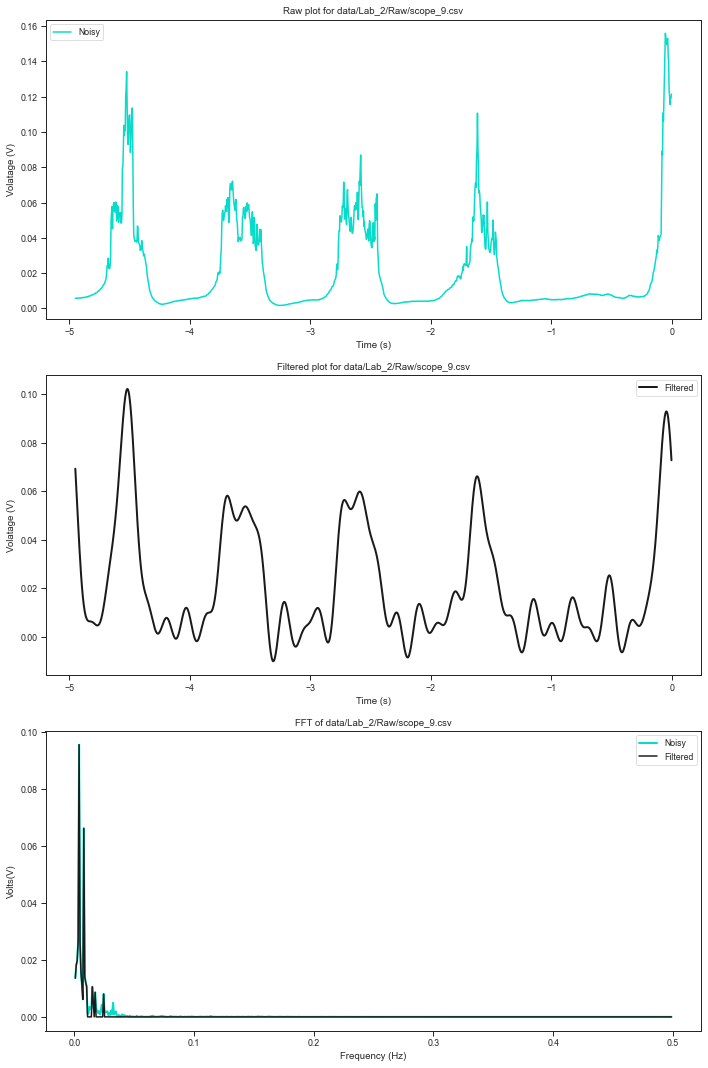

In [80]:
# Choose trigger value for noise removal
indices = PSD > 0.005
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

# Format plot specifications
fig,axs = plt.subplots(3,1)
plt.rcParams['figure.figsize'] = [10, 8]

# Plot Raw data from CSV
plt.sca(axs[0])
plt.plot(t, f, color='#07DCCB', LineWidth=1.5, label="Noisy")
plt.title(f'Raw plot for {data}')
plt.xlabel('Time (s)')
plt.ylabel('Volatage (V)')
plt.legend()

# Plot Filtered data after FFT has been applied
plt.sca(axs[1])
plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
plt.title(f'Filtered plot for {data}')
plt.xlabel('Time (s)')
plt.ylabel('Volatage (V)')
plt.legend()

# Plot FFT 
plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='#07DCCB', LineWidth=2, label="Noisy")
plt.plot(freq[L], PSDclean[L], color='k', LineWidth=1.5, label="Filtered")
plt.title(f'FFT of {data}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Volts(V)")
plt.legend()

plt.tight_layout()

# save raw scope as png in data/plots
image_path = f'data/Plots/Lab_{lab_num}/FFT_comparison_plots/scope_{scope_num}.png'
plt.savefig(image_path, dpi=300, bbox_inches='tight', transparent=False)

plt.show

In [81]:
# Save the FFT filtered CSV files under Lab_<lab_num>/Filtered/FFT
t = np.array(t)
df = pd.DataFrame(list(zip(*[t,ffilt])))
df.columns=['x_axis', 'channel_2']
df.to_csv(f'data/Lab_{lab_num}/Filtered/FFT/scope_{scope_num}.csv', index=False)